In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the csv file, must be done locally as it is > 100 GB
ct = pd.read_csv("C:/Users/conor/Desktop/city_temperature/city_temperature.csv")
ct.head(5)

C:\Users\conor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
#We will be looking at the city Charlotte, North Carolina so we don't need to worry about any rows that aren't in our city
clt = ct[ct['City'] == 'Charlotte']
clt

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2328623,North America,US,North Carolina,Charlotte,1,1,1995,41.9
2328624,North America,US,North Carolina,Charlotte,1,2,1995,43.9
2328625,North America,US,North Carolina,Charlotte,1,3,1995,33.6
2328626,North America,US,North Carolina,Charlotte,1,4,1995,33.3
2328627,North America,US,North Carolina,Charlotte,1,5,1995,28.0
...,...,...,...,...,...,...,...,...
2337883,North America,US,North Carolina,Charlotte,5,9,2020,52.7
2337884,North America,US,North Carolina,Charlotte,5,10,2020,55.9
2337885,North America,US,North Carolina,Charlotte,5,11,2020,58.6
2337886,North America,US,North Carolina,Charlotte,5,12,2020,52.6


In [4]:
#Are there any null values (.isna()) and if so, how many (.sum()?
clt.isna().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [5]:
#Are there any duplicated rows? If so, how many?
clt.duplicated().sum()

0

In [6]:
#Are our days all valid, or in a correct range?
#We use a tilde to switch the condition to it's reverse
clt[~clt['Day'].isin(range(1,32))]

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [7]:
#Months?
clt[~clt['Month'].isin(range(1,13))]

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [8]:
#Year?
clt[~clt['Year'].isin(range(1995,2021))]

,Region,Country,State,City,Month,Day,Year,AvgTemperature


#### From the datasource, we know that any row where AvgTemperature == -99.0 really means the reading for that day was not available. Let's see if we have any of those

In [9]:
#Subset our dataframe for rows where the AvgTemperature column is -99.0
clt[clt['AvgTemperature'] == -99.0]

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2330076,North America,US,North Carolina,Charlotte,12,24,1998,-99.0
2330077,North America,US,North Carolina,Charlotte,12,25,1998,-99.0
2330082,North America,US,North Carolina,Charlotte,12,30,1998,-99.0
2330083,North America,US,North Carolina,Charlotte,12,31,1998,-99.0
2330093,North America,US,North Carolina,Charlotte,1,10,1999,-99.0
2331348,North America,US,North Carolina,Charlotte,6,18,2002,-99.0
2331349,North America,US,North Carolina,Charlotte,6,19,2002,-99.0
2331350,North America,US,North Carolina,Charlotte,6,20,2002,-99.0
2331351,North America,US,North Carolina,Charlotte,6,21,2002,-99.0
2331604,North America,US,North Carolina,Charlotte,3,1,2003,-99.0


#### Let's make these rows null, then drop them

In [10]:
clt['AvgTemperature'] = clt['AvgTemperature'].replace(-99.0, np.nan)
clt = clt.dropna(axis = 0, subset = ['AvgTemperature'])

<ipython-input-10-de9e3e17cec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clt['AvgTemperature'] = clt['AvgTemperature'].replace(-99.0, np.nan)


In [11]:
clt.sort_values('AvgTemperature')

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2335569,North America,US,North Carolina,Charlotte,1,7,2014,15.6
2329023,North America,US,North Carolina,Charlotte,2,5,1996,16.4
2331568,North America,US,North Carolina,Charlotte,1,24,2003,17.6
2335978,North America,US,North Carolina,Charlotte,2,20,2015,17.9
2335935,North America,US,North Carolina,Charlotte,1,8,2015,18.8
...,...,...,...,...,...,...,...,...
2333227,North America,US,North Carolina,Charlotte,8,10,2007,88.9
2329896,North America,US,North Carolina,Charlotte,6,27,1998,89.1
2329897,North America,US,North Carolina,Charlotte,6,28,1998,89.3
2333226,North America,US,North Carolina,Charlotte,8,9,2007,90.0


In [12]:
#Let's take our new DataFrame and write it to a csv so that it can be uploaded to github (make sure to name it .filetype)
#clt.to_csv('charlotte_temperatures.csv')
#You can comment this out once it's been created so we don't keep creating csv's

#### We saw the year 2020 ends in May when we called .head() on our original dataframe, this is why our average temp for the year 2020 is so low. Let's go ahead and drop that.

In [13]:
#Here we subset our original dataframe, apply our groupby function and then reset the index such that we have our columns
clt_yr = clt[clt['Year'].isin(range(1995,2020))].groupby('Year').mean()['AvgTemperature'].reset_index()
clt_yr

,Year,AvgTemperature
0,1995,60.128767
1,1996,59.692350
2,1997,61.025753
3,1998,63.548753
4,1999,61.033791
5,2000,59.469399
6,2001,61.153973
7,2002,60.926316
8,2003,59.471429
9,2004,60.423770


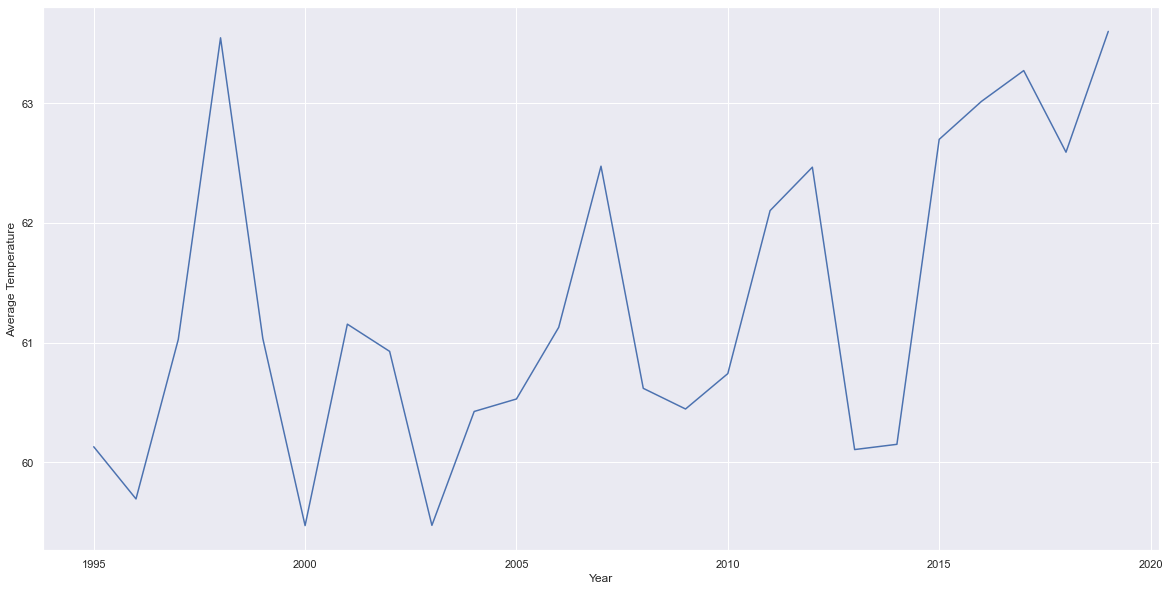

In [51]:
plt.figure(figsize = (20,10))

sns.set_theme()
plt.plot(clt_yr['Year'],clt_yr['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

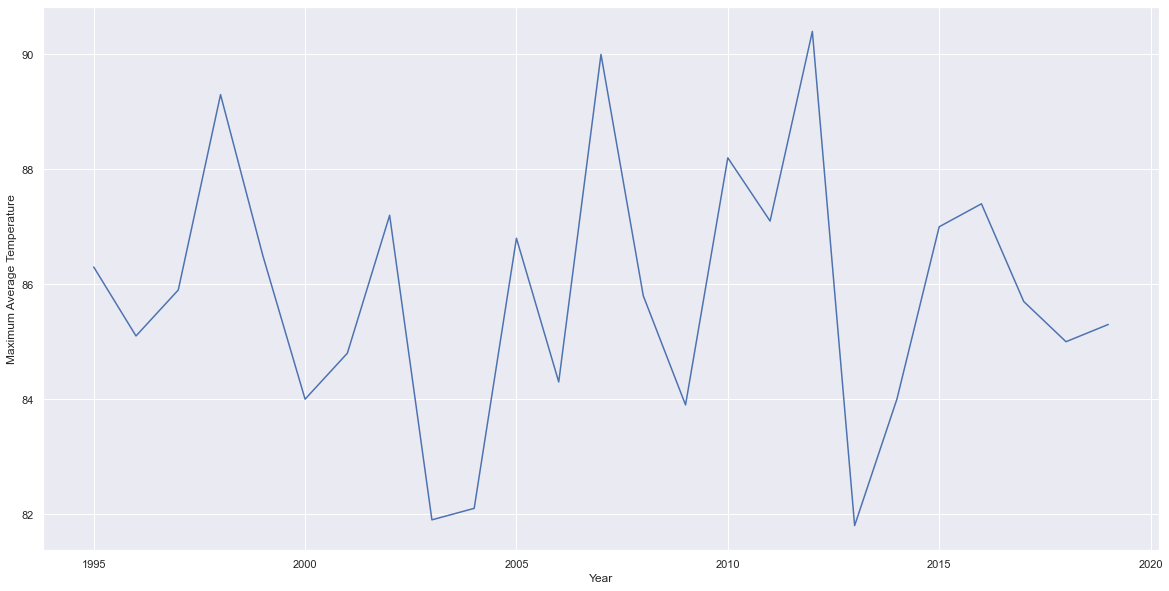

In [48]:
year_max = clt[clt['Year'].isin(range(1995,2020))].groupby(['Year'], sort = False)['AvgTemperature'].max().reset_index()
plt.figure(figsize = (20,10))
sns.set_theme()
plt.plot(year_max['Year'],year_max['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Maximum Average Temperature')
plt.show()

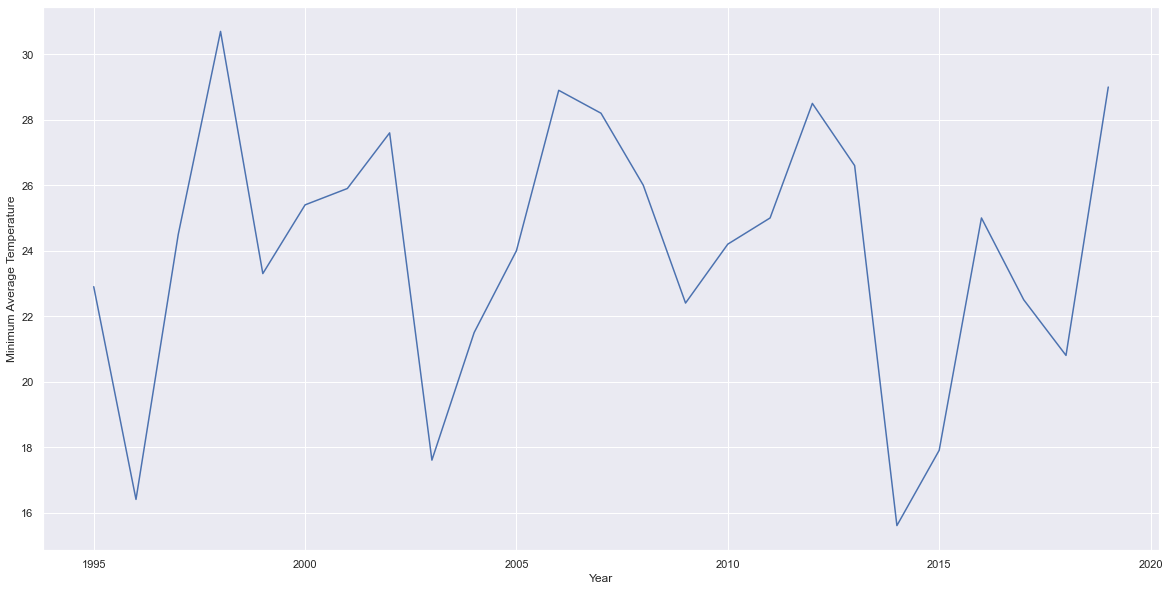

In [53]:
year_min = clt[clt['Year'].isin(range(1995,2020))].groupby(['Year'], sort = False)['AvgTemperature'].min().reset_index()
plt.figure(figsize = (20,10))
sns.set_theme()
plt.plot(year_min['Year'],year_min['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Minimum Average Temperature')
plt.show()

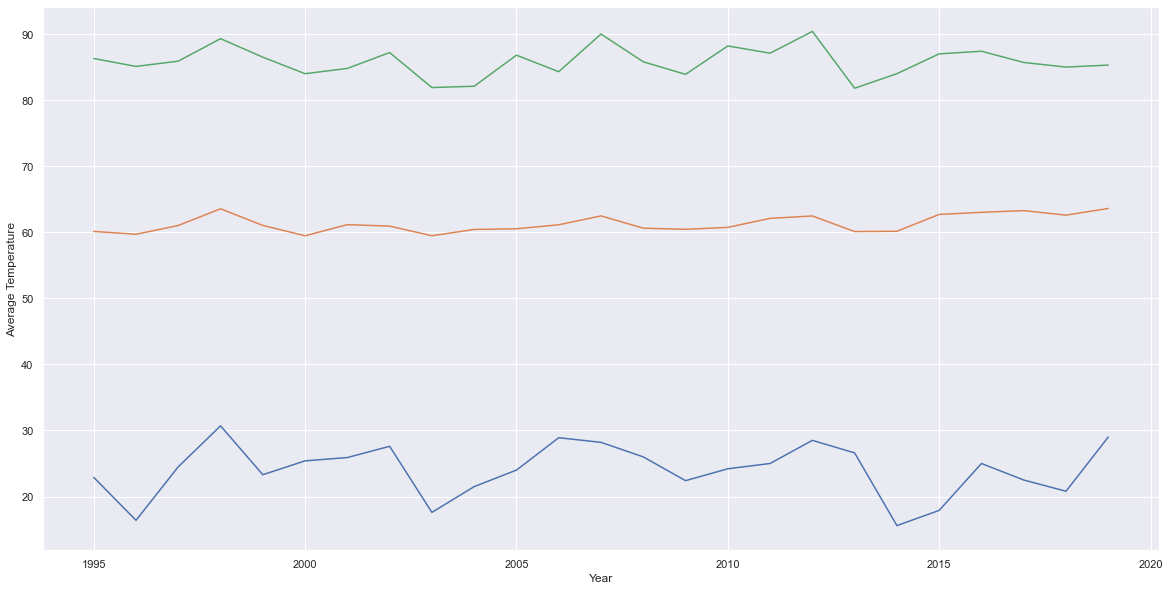

In [57]:
plt.figure(figsize = (20,10))
sns.set_theme()
plt.plot(year_min['Year'],year_min['AvgTemperature'])
plt.plot(clt_yr['Year'],clt_yr['AvgTemperature'])
plt.plot(year_max['Year'],year_max['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

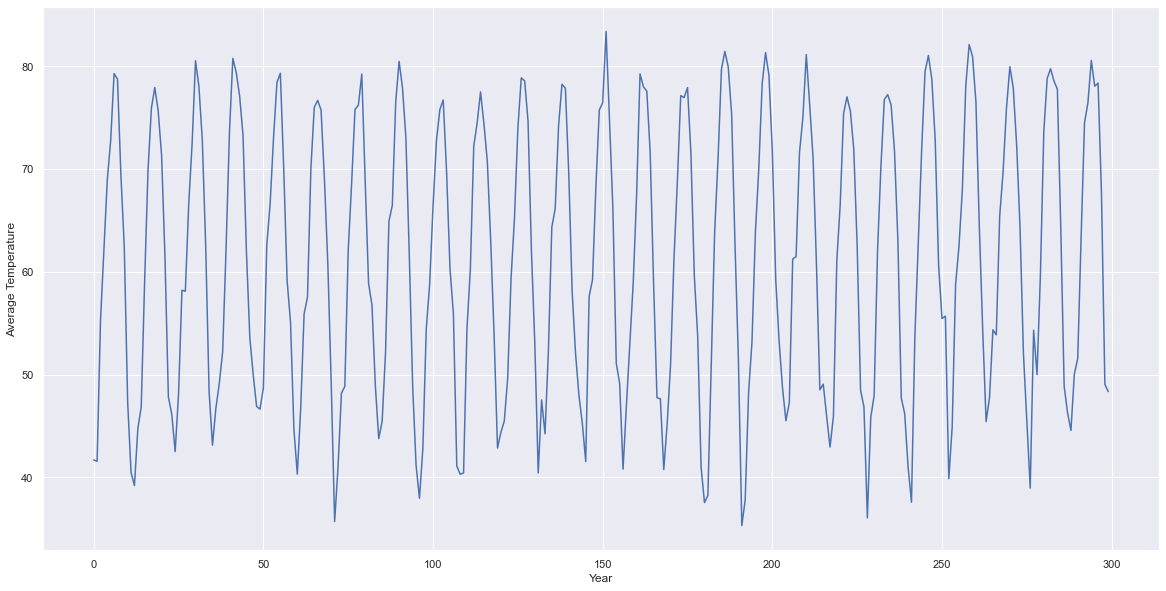

In [50]:
clt_yr_mt = clt[clt['Year'].isin(range(1995,2020))].groupby(['Year','Month']).mean()['AvgTemperature'].reset_index()
plt.figure(figsize = (20,10))
sns.set_theme()
plt.plot(clt_yr_mt['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

In [21]:
#It would be nice to have, instead of 3 INT columns for our time, one singular datetime column
clt["date_time"] = pd.to_datetime((clt.Year*10000 + clt.Month*100 + clt.Day).apply(str),format='%Y%m%d')
clt.head()

<ipython-input-21-c3f8a36d6fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clt["date_time"] = pd.to_datetime((clt.Year*10000 + clt.Month*100 + clt.Day).apply(str),format='%Y%m%d')


,Region,Country,State,City,Month,Day,Year,AvgTemperature,date_time
2328623,North America,US,North Carolina,Charlotte,1,1,1995,41.9,1995-01-01
2328624,North America,US,North Carolina,Charlotte,1,2,1995,43.9,1995-01-02
2328625,North America,US,North Carolina,Charlotte,1,3,1995,33.6,1995-01-03
2328626,North America,US,North Carolina,Charlotte,1,4,1995,33.3,1995-01-04
2328627,North America,US,North Carolina,Charlotte,1,5,1995,28.0,1995-01-05


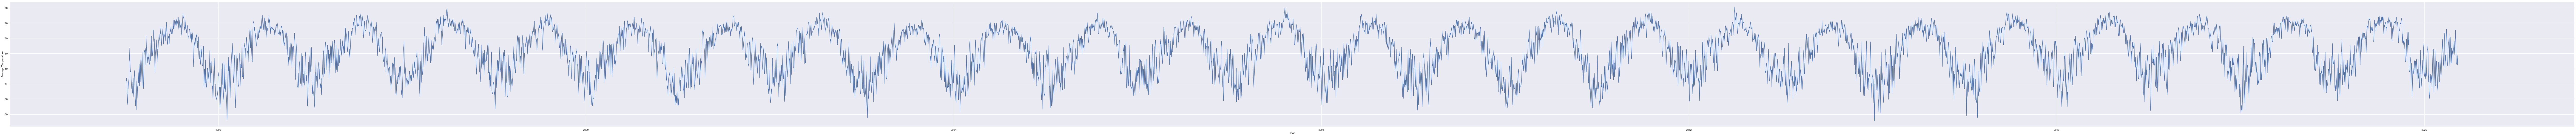

In [26]:
plt.figure(figsize = (200,10))
sns.set_theme()
plt.plot(clt['date_time'],clt['AvgTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()